In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import incision_detection_mmdet
import numpy as np

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NOTE! Installing ujson may make loading annotations faster.


2023-12-07 19:52:14,320 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - mmdet.version=2.25.0
2023-12-07 19:52:14,321 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - 11.7
2023-12-07 19:52:14,321 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - GCC 9.4


1.12.0a0+8a1a93a True


In [2]:
!pwd

/webapps/piglegsurgery/piglegcv


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Thu Dec  7 19:52:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   43C    P8     9W / 250W |    309MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
torch.__version__

'1.12.0a0+8a1a93a'

In [6]:
Path("/root/.cache/torch/hub/checkpoints/").exists()

PermissionError: [Errno 13] Permission denied: '/root/.cache/torch/hub/checkpoints'

In [7]:
!ls /root/.cache/torch/hub/checkpoints/

ls: cannot access '/root/.cache/torch/hub/checkpoints/': Permission denied


# Run incision crop

In [8]:
# find the video
i = -5
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*knopf*.mp4"))
print(len(img_pths))
img_pths[i]

77


PosixPath('../piglegsurgeryweb/media/upload/20230222-130058_Einzelknopfnaht_075e5ae66dbce61ad576a8c90d2623b76e2ea990/Einzelknopfnaht.mp4')

2023-12-07 19:52:23.276 | DEBUG    | run_perpendicular:get_frame_to_process:162 - 3415
2023-12-07 19:52:23.530 | DEBUG    | run_perpendicular:get_frame_to_process:171 - Last frame capture error, frame
2023-12-07 19:52:23.658 | DEBUG    | run_perpendicular:get_frame_to_process:171 - Last frame capture error, frame
2023-12-07 19:52:23.784 | DEBUG    | run_perpendicular:get_frame_to_process:171 - Last frame capture error, frame
2023-12-07 19:52:23.911 | DEBUG    | run_perpendicular:get_frame_to_process:171 - Last frame capture error, frame
2023-12-07 19:52:24.050 | DEBUG    | run_perpendicular:get_frame_to_process:171 - Last frame capture error, frame


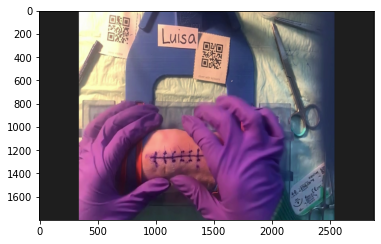

In [9]:
# get the frame
img = pigleg_cv.get_frame_to_process(img_pths[i])
# opencv has inverted color channels
plt.imshow(img[:,:,::-1])


2023-12-07 19:52:25,197 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-12-07 19:52:25,206 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(1800, 2880, 3), max(img)=255


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-12-07 19:52:28,086 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1


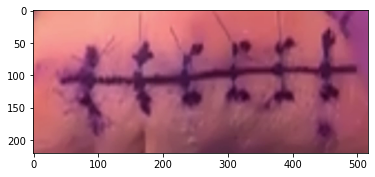

In [10]:
# find the incision
imgs, bboxes = incision_detection_mmdet.run_incision_detection(img, "./delete/")
plt.imshow(imgs[0][:,:,::-1])

In [11]:
# pip install mmcv-full

# Run whole image processing

In [21]:
# find the video
i = 51
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*.jpg"))
print(len(img_pths))
print(img_pths[i])
pgcv = pigleg_cv.DoComputerVision(str(img_pths[i]),  "./del_test_image_output/")
pgcv.run_image_processing()

2023-12-07 20:07:19.289 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:207 - device=cpu


425
../piglegsurgeryweb/media/upload/20211012-194853_2021.10.12-A-Fritzsch.Sarah-Einzelknopfnaht_a4e4d1e180ca413333a42856707de055c47085ab/preview.jpg


2023-12-07 20:07:21.344 | DEBUG    | run_qr:get_bboxes:37 - [[     222.44      95.312      249.22      121.47     0.99717]
 [          0      10.212      297.02      245.73     0.14828]
 [     1.8379      8.6758         300      50.026     0.12241]
 [     12.457      158.21      262.13      289.76     0.11095]]
2023-12-07 20:07:21.559 | DEBUG    | run_qr:bbox_info_extraction_from_frame:80 - qr code text = 'QR scale pigleg'
2023-12-07 20:07:21.560 | DEBUG    | run_qr:bbox_info_extraction_from_frame:149 - {'bbox_scene_area': [1.5656661987304688,
                     47.17547607421875,
                     300.0,
                     268.0776062011719,
                     0.37624675035476685],
 'box': [[223, 97], [224, 120], [248, 119], [248, 95]],
 'incision_bboxes': [],
 'is_detected': True,
 'pix_size': 0.0011728050554602873,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.0010590271297461938,
 'qr_bboxes_SFD': [[222.444580078125,
                    95.31200408935547

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-07 20:07:23,875 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-07 20:07:23.877 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:218 - {'bbox_scene_area': [1.5656661987304688,
                     47.17547607421875,
                     300.0,
                     268.0776062011719,
                     0.37624675035476685],
 'box': [[223, 97], [224, 120], [248, 119], [248, 95]],
 'incision_bboxes': [],
 'incision_bboxes_old': [],
 'is_detected': True,
 'pix_size': 0.0011728050554602873,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.0010590271297461938,
 'qr_bboxes_SFD': [[222.444580078125,
                    95.31200408935547,
                    249.220458984375,
                    121.47246551513672,
                    0.9971699118614197]],
 'qr_scissors_frame_detected': False,
 'qr_scissors_frames': [],
 'qr_size': 0.027,
 'size_by_scene': 0.001,
 'text': 'QR scale pigleg'}
2

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-12-07 20:07:28,664 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 0
2023-12-07 20:07:28.665 | DEBUG    | run_perpendicular:main_perpendicular:294 - len(imgs)=0
2023-12-07 20:07:28.667 | DEBUG    | pigleg_cv:run_image_processing:118 - Perpendicular finished.


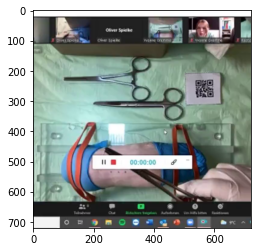

In [23]:
plt.imshow(pgcv.frame[...,::-1])

In [24]:
pgcv.meta

{'duration_s_get_parameters_for_crop_rotate_rescale': 4.592257976531982,
 'duration_s_do_crop_rotate_rescale': 0.21142935752868652,
 'qr_data': {'pix_size_method': 'pix_size_single_frame_detector_m',
  'is_detected': False,
  'box': [],
  'pix_size': 0.00043962048609243935,
  'incision_bboxes': [],
  'qr_size': 0.027,
  'size_by_scene': 0.00041666666666666664,
  'text': None,
  'pix_size_single_frame_detector_m': 0.00043962048609243935,
  'bbox_scene_area': [12.856722831726074,
   87.73623657226562,
   719.9999389648438,
   695.0230712890625,
   0.38878244161605835],
  'qr_scissors_frame_detected': False,
  'qr_bboxes_SFD': [[533.4580688476562,
    228.5966339111328,
    599.1509399414062,
    291.48974609375,
    0.9950441122055054]],
  'qr_scissors_frames': []},
 'pixelsize_m_by_incision_size': None,
 'incision_bboxes': [],
 'stitch_scores': []}

# Run whole video processing

In [ ]:
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/test*.mp4"))
img_pths[0]

In [ ]:
pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)

## Run just `main_report()`

You can repeat to do the main report afer the `do_computer_vision()` is done firsttime

In [ ]:

# pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)
pigleg_cv.main_report(str(img_pths[0]),  "./del_test_video_output/")

In [16]:
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

In [17]:
!python /home/appuser/mmdetection/mmdet/utils/collect_env.py

fatal: detected dubious ownership in repository at '/webapps/piglegsurgery'
To add an exception for this directory, call:

	git config --global --add safe.directory /webapps/piglegsurgery
sys.platform: linux
Python: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) [GCC 10.3.0]
CUDA available: True
GPU 0: NVIDIA GeForce GTX 1080 Ti
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.7, V11.7.64
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 1.12.0a0+8a1a93a
PyTorch compiling details: PyTorch built with:
  - GCC 9.4
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash N/A)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_52,code=sm_52;-gencode;arch=compute_60,cod

In [ ]:
!pwd

In [ ]:
pip list

In [35]:
# !MMCV_WITH_OPS=1 FORCE_CUDA=1 pip install mmcv-full==1.5.2

In [36]:
# !pip uninstall -y mmcv-full